# LAYOFF ANALYSIS 

Project explores a Dataframe of Layoffs Data from 2020-2022, consequently to Covid-19 Pandemic and beginning of Inflation

Original dataset can be tracked at https://layoffs.fyi/

In [417]:
import numpy as np
import pandas as pd
import seaborn as sns
# Missing Data
import missingno as msng

import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

#### Reveal DataFrame

In [418]:
df = pd.read_csv('/Users/saralombardo/Dropbox/SL22020003093/layoffs_data.csv')
df

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,JD.ID,Jakarta,Retail,200.0,0.30,2022-12-14,https://jakartaglobe.id/business/jdid-layoffs-...,5100.0,IPO,2022-12-15 02:19:38,Indonesia,Unknown
1,GoStudent,Vienna,Education,100.0,NaN,2022-12-14,https://www.businessinsider.com/gostudent-3-bi...,686.0,Series D,2022-12-15 02:11:42,Austria,Unknown
2,ChowNow,Los Angeles,Food,40.0,0.10,2022-12-14,https://www.restaurantbusinessonline.com/amp/t...,64.0,Series C,2022-12-15 02:10:04,United States,Unknown
3,Landing,Birmingham,Real Estate,NaN,NaN,2022-12-14,https://www.al.com/business/2022/12/birmingham...,347.0,Series C,2022-12-15 02:10:48,United States,Unknown
4,Thumbtack,SF Bay Area,Consumer,160.0,0.14,2022-12-13,Internal memo,698.0,Series I,2022-12-13 20:12:50,United States,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1804,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,Unknown
1805,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,Unknown
1806,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,Unknown
1807,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,https://www.bizjournals.com/louisville/news/20...,12.0,Series A,2020-03-31 13:21:54,United States,Unknown


#### Exploring Columns

In [419]:
df.columns

Index(['Company', 'Location', 'Industry', 'Laid_Off_Count', 'Percentage',
       'Date', 'Source', 'Funds_Raised', 'Stage', 'Date_Added', 'Country',
       'List_of_Employees_Laid_Off'],
      dtype='object')

#### Columns Identification:
Company = Name of the Company

Location = Location of the Company

Laid_Off_Count	 = Total count of Layoff

Percentage = Percentage of layoff

Date = Date of Layoff 

Source = Data gathered from source

Funds_Raised = Total Funds raised , according to the corresponding Stage

Stage = Financial Stage of the company (Fundings)

Date_added = date the data were added into database

Country = Country where the company is located

List_of_Employees_Laid_Off = link to g_docs of employee list

#### Exploring Rows

In [420]:
# Finding number of Rows
df.shape[0]

1809

Size of the database contains 1890 rows, insertion of Data

# DATA CLEANING

#### First cleaning: drop any duplicate rows, if any exist

In [421]:
# drop duplicates: rows
df.drop_duplicates(inplace=True)
# check
df.shape[0]

1809

### MISSING DATA

<AxesSubplot: >

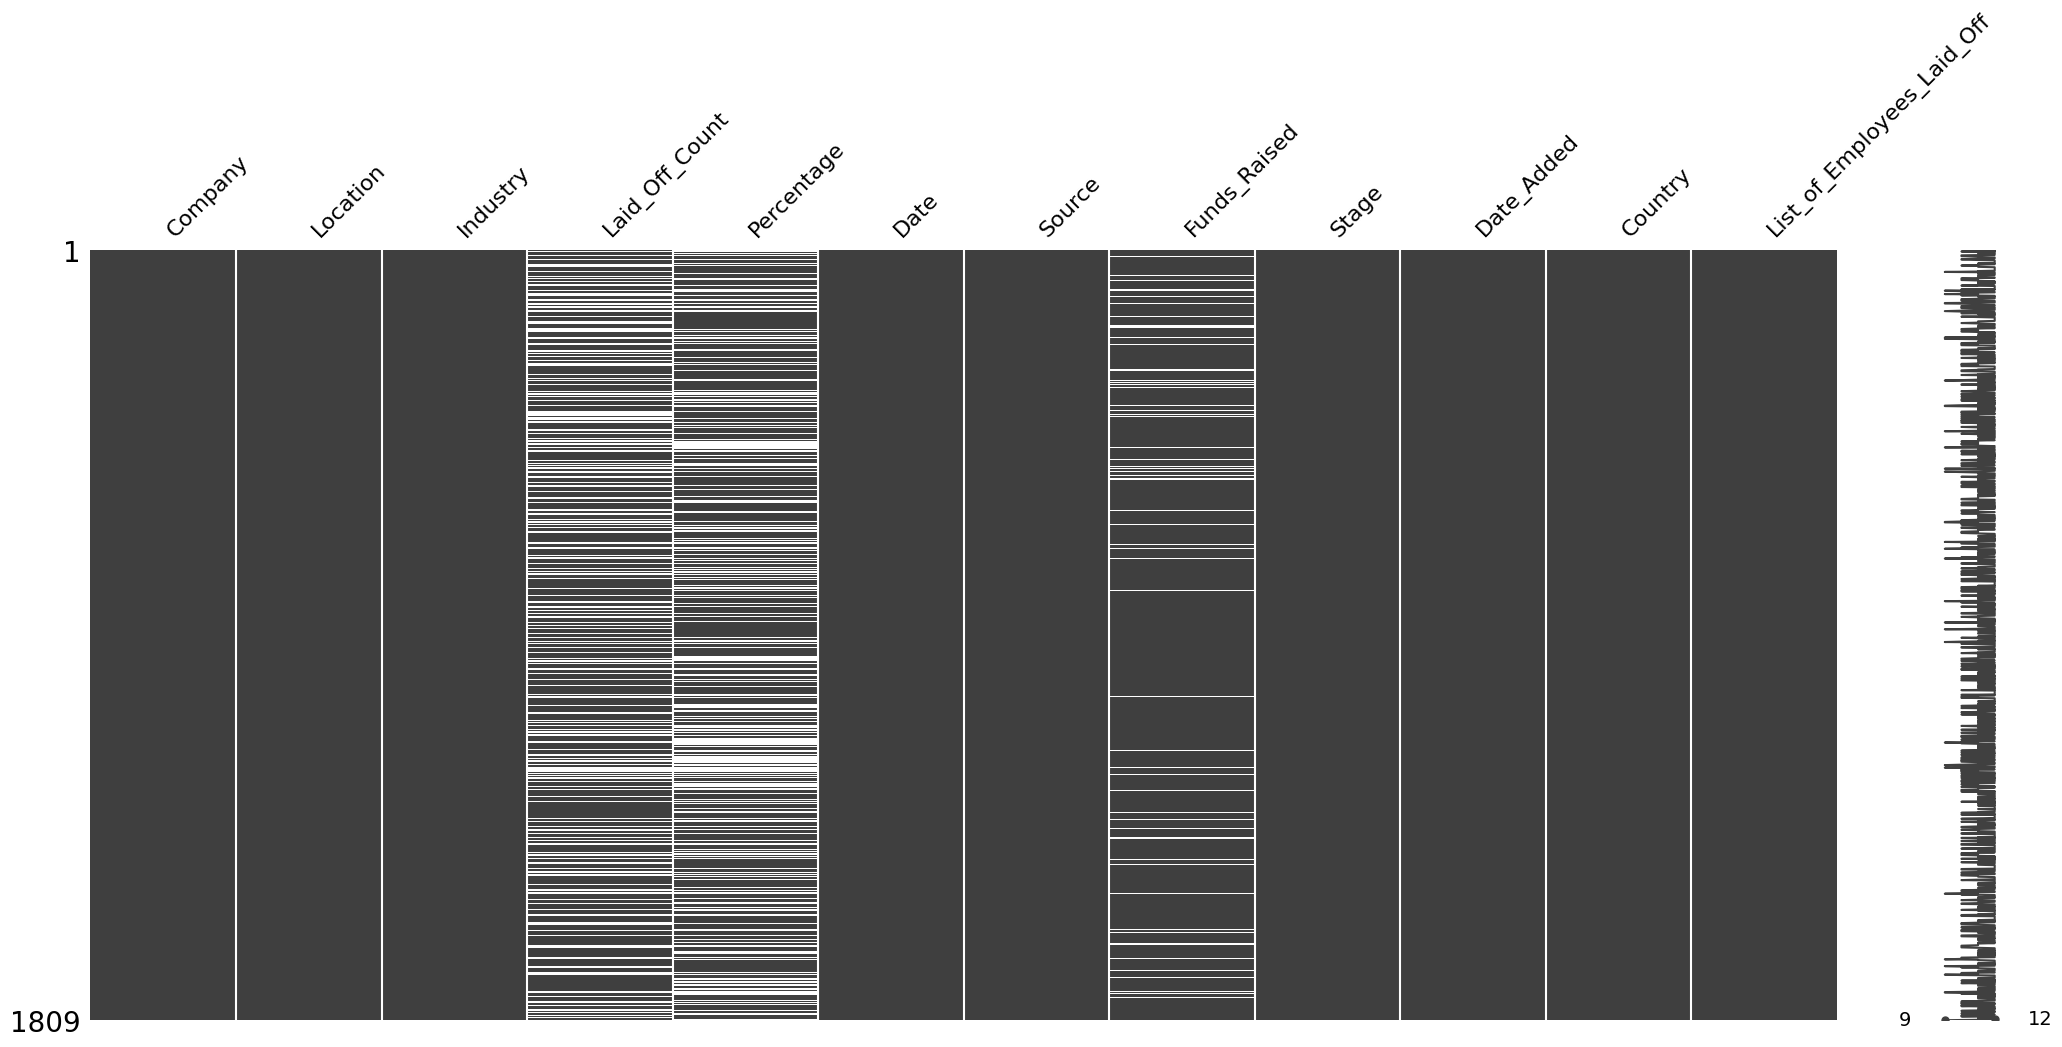

In [422]:
msng.matrix(df)

#### Second cleaning step: drop selected columns

In [423]:
# Data not relevant to the data exploration
df.drop(['List_of_Employees_Laid_Off',
         'Source',
        'Date_Added',], axis=1, inplace=True)

#### Exploring missing values

In [424]:
# considering nan values in df
tot_nan = df.isnull().sum()
tot_nan

Company             0
Location            0
Industry            0
Laid_Off_Count    539
Percentage        588
Date                1
Funds_Raised      134
Stage               0
Country             0
dtype: int64

#### Percentage of Missing Data

In [425]:
# how many total missing values do we have?
total_cells = np.product(df.shape)    # 16281
total_missing = tot_nan.sum()         # 1262

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)


7.751366623671764


__7.7 %__ of the data in the dataset is __missing__
>

### Handling missing values

The missing values are missing because weren't recorded. 

This exploration will guess what it might have been, based on the other values in the column and row. 

This is called __imputation.__

#### LAid off column

In [426]:
df["Laid_Off_Count"].mean()

194.8952755905512

In [427]:
df["Laid_Off_Count"].median()

70.0

In [428]:
df["Laid_Off_Count"].fillna(70, inplace=True)

The __mean__ and __median__ are significantly different (mean = 194, median = 70), therefore __it will be chosen the median__ to describe the centre of the distribution.

#### Percentage column

In [429]:
df["Percentage"].mean()

0.273556511056511

In [430]:
df["Percentage"].median()

0.18

In [431]:
df["Percentage"].fillna(0.18, inplace=True)

The __mean__ and __median__ are in this case quite close to each other (mean = 0.27, median = 0.18) on a scale of Percentange from 0 to 1.

Our distribution has slightly bell shape but not quite, although the mean and the median are closer to each other, compared with the previous observation, they present a moderate distance.

Therefore, __it will be still chosen the median__ to describe the centre of the distribution.

In [432]:
# considering nan values in df
tot_nan = df.isnull().sum()
tot_nan

Company             0
Location            0
Industry            0
Laid_Off_Count      0
Percentage          0
Date                1
Funds_Raised      134
Stage               0
Country             0
dtype: int64

The single missing __date__ is not relevant as missing data and it will not compromise the exploration of that column.

__Funds Raised__ columns will be left as well, as it won't be used in the visualition.

## DATA INCONSISTENCY
Exploring occurences of Data Inconsistency:

In [433]:
df.dtypes

Company            object
Location           object
Industry           object
Laid_Off_Count    float64
Percentage        float64
Date               object
Funds_Raised      float64
Stage              object
Country            object
dtype: object

__One Error__: 'Date' columns is saved as object and  needs to be converted to datetime64 

#### Convert Date Object ->  datetime64

In [434]:
from datetime import date
# create a new column, date_parsed, with the parsed dates
df['date_parsed'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['date_parsed'].dtype

dtype('<M8[ns]')

### Data inconsistency related to data entry. 

The numerical most relevant columns have been quickly checked to find if any data entry was inserted as string rather than numerical values.

In [435]:
df['Percentage'].unique()
df['Laid_Off_Count'].unique()
df['date_parsed'].unique()

array(['2022-12-14T00:00:00.000000000', '2022-12-13T00:00:00.000000000',
       '2022-12-12T00:00:00.000000000', '2022-12-10T00:00:00.000000000',
       '2022-12-09T00:00:00.000000000', '2022-12-08T00:00:00.000000000',
       '2022-12-07T00:00:00.000000000', '2022-12-06T00:00:00.000000000',
       '2022-12-05T00:00:00.000000000', '2022-12-03T00:00:00.000000000',
       '2022-12-02T00:00:00.000000000', '2022-12-01T00:00:00.000000000',
       '2022-11-30T00:00:00.000000000', '2022-11-29T00:00:00.000000000',
       '2022-11-28T00:00:00.000000000', '2022-11-26T00:00:00.000000000',
       '2022-11-25T00:00:00.000000000', '2022-11-24T00:00:00.000000000',
       '2022-11-23T00:00:00.000000000', '2022-11-22T00:00:00.000000000',
       '2022-11-21T00:00:00.000000000', '2022-11-19T00:00:00.000000000',
       '2022-11-18T00:00:00.000000000', '2022-11-17T00:00:00.000000000',
       '2022-11-16T00:00:00.000000000', '2022-11-15T00:00:00.000000000',
       '2022-11-14T00:00:00.000000000', '2022-11-11

__No Error__ found
>

In [436]:
# Final df check:
df.shape[0]

1809

>

# *--  DATA ANALYSIS --                        *

### Layoff Data by Company

In [437]:
#Laid_Off_Count
companies = df.groupby('Company').sum()
companies = companies.sort_values(by= 'Laid_Off_Count', ascending=False)
companies.head(30)

/var/folders/m7/nd04n9m14gx4x780byggkvpr0000gn/T/ipykernel_884/3261398905.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  companies = df.groupby('Company').sum()


,Laid_Off_Count,Percentage,Funds_Raised
Company,,,
Meta,11000.0,0.1300,26000.0
Amazon,10000.0,0.0300,108.0
Uber,7585.0,0.9300,123500.0
Booking.com,4601.0,0.4300,0.0
Cisco,4100.0,0.0500,2.0
Peloton,4084.0,0.4500,5700.0
Better.com,4040.0,0.7800,3620.0
Carvana,4000.0,0.2000,3200.0
Twitter,3770.0,0.6800,18600.0


#### Returning Number of companies in the df

In [438]:
companies.shape[0]

1501

There are __1501__ companies in our Dataframe

####  LAYOFF DISTRIBUTION

Text(0.5, 1.0, 'LAYOFF DISTRIBUTION')

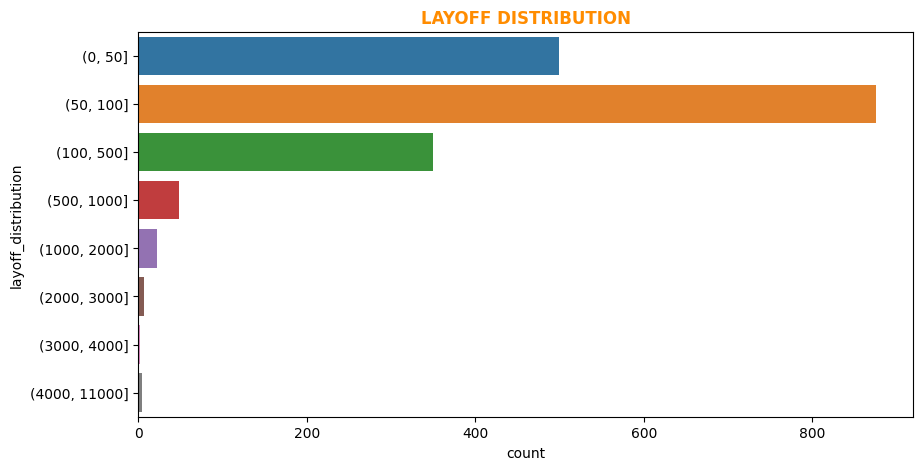

In [439]:
# Use 
df['layoff_distribution'] = pd.cut( df['Laid_Off_Count'], [0, 50, 100, 500, 1000, 2000, 3000, 4000, 11000 ] )

fig = plt.figure(figsize=(10,5))
sns.countplot(y= df['layoff_distribution'], data=df );
plt.title('LAYOFF DISTRIBUTION', color='darkorange', fontweight='bold')

#### Top 20 Companies

In [440]:
# Selecting top 20 Companies with highest 'Laid_Off_Count'
top_20 = companies.iloc[0:20, : ]
top_20

,Laid_Off_Count,Percentage,Funds_Raised
Company,,,
Meta,11000.0,0.1300,26000.0
Amazon,10000.0,0.0300,108.0
Uber,7585.0,0.9300,123500.0
Booking.com,4601.0,0.4300,0.0
Cisco,4100.0,0.0500,2.0
Peloton,4084.0,0.4500,5700.0
Better.com,4040.0,0.7800,3620.0
Carvana,4000.0,0.2000,3200.0
Twitter,3770.0,0.6800,18600.0


#### Funds Raised by the Companies

In [441]:
df.groupby('Stage').mean()

/var/folders/m7/nd04n9m14gx4x780byggkvpr0000gn/T/ipykernel_884/709633772.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Stage').mean()


,Laid_Off_Count,Percentage,Funds_Raised
Stage,,,
Acquired,180.467742,0.260032,185.023762
IPO,407.380952,0.170192,3679.804564
Private Equity,220.187500,0.175313,858.708276
Seed,59.525424,0.564068,4.812282
Series A,58.082192,0.311301,34.953191
Series B,71.800000,0.290039,98.344940
Series C,88.476000,0.213800,196.583200
Series D,106.136126,0.186597,346.227807
Series E,123.670213,0.197021,527.904255


Text(0.5, 1.0, 'Funds Raised by the Compnaies')

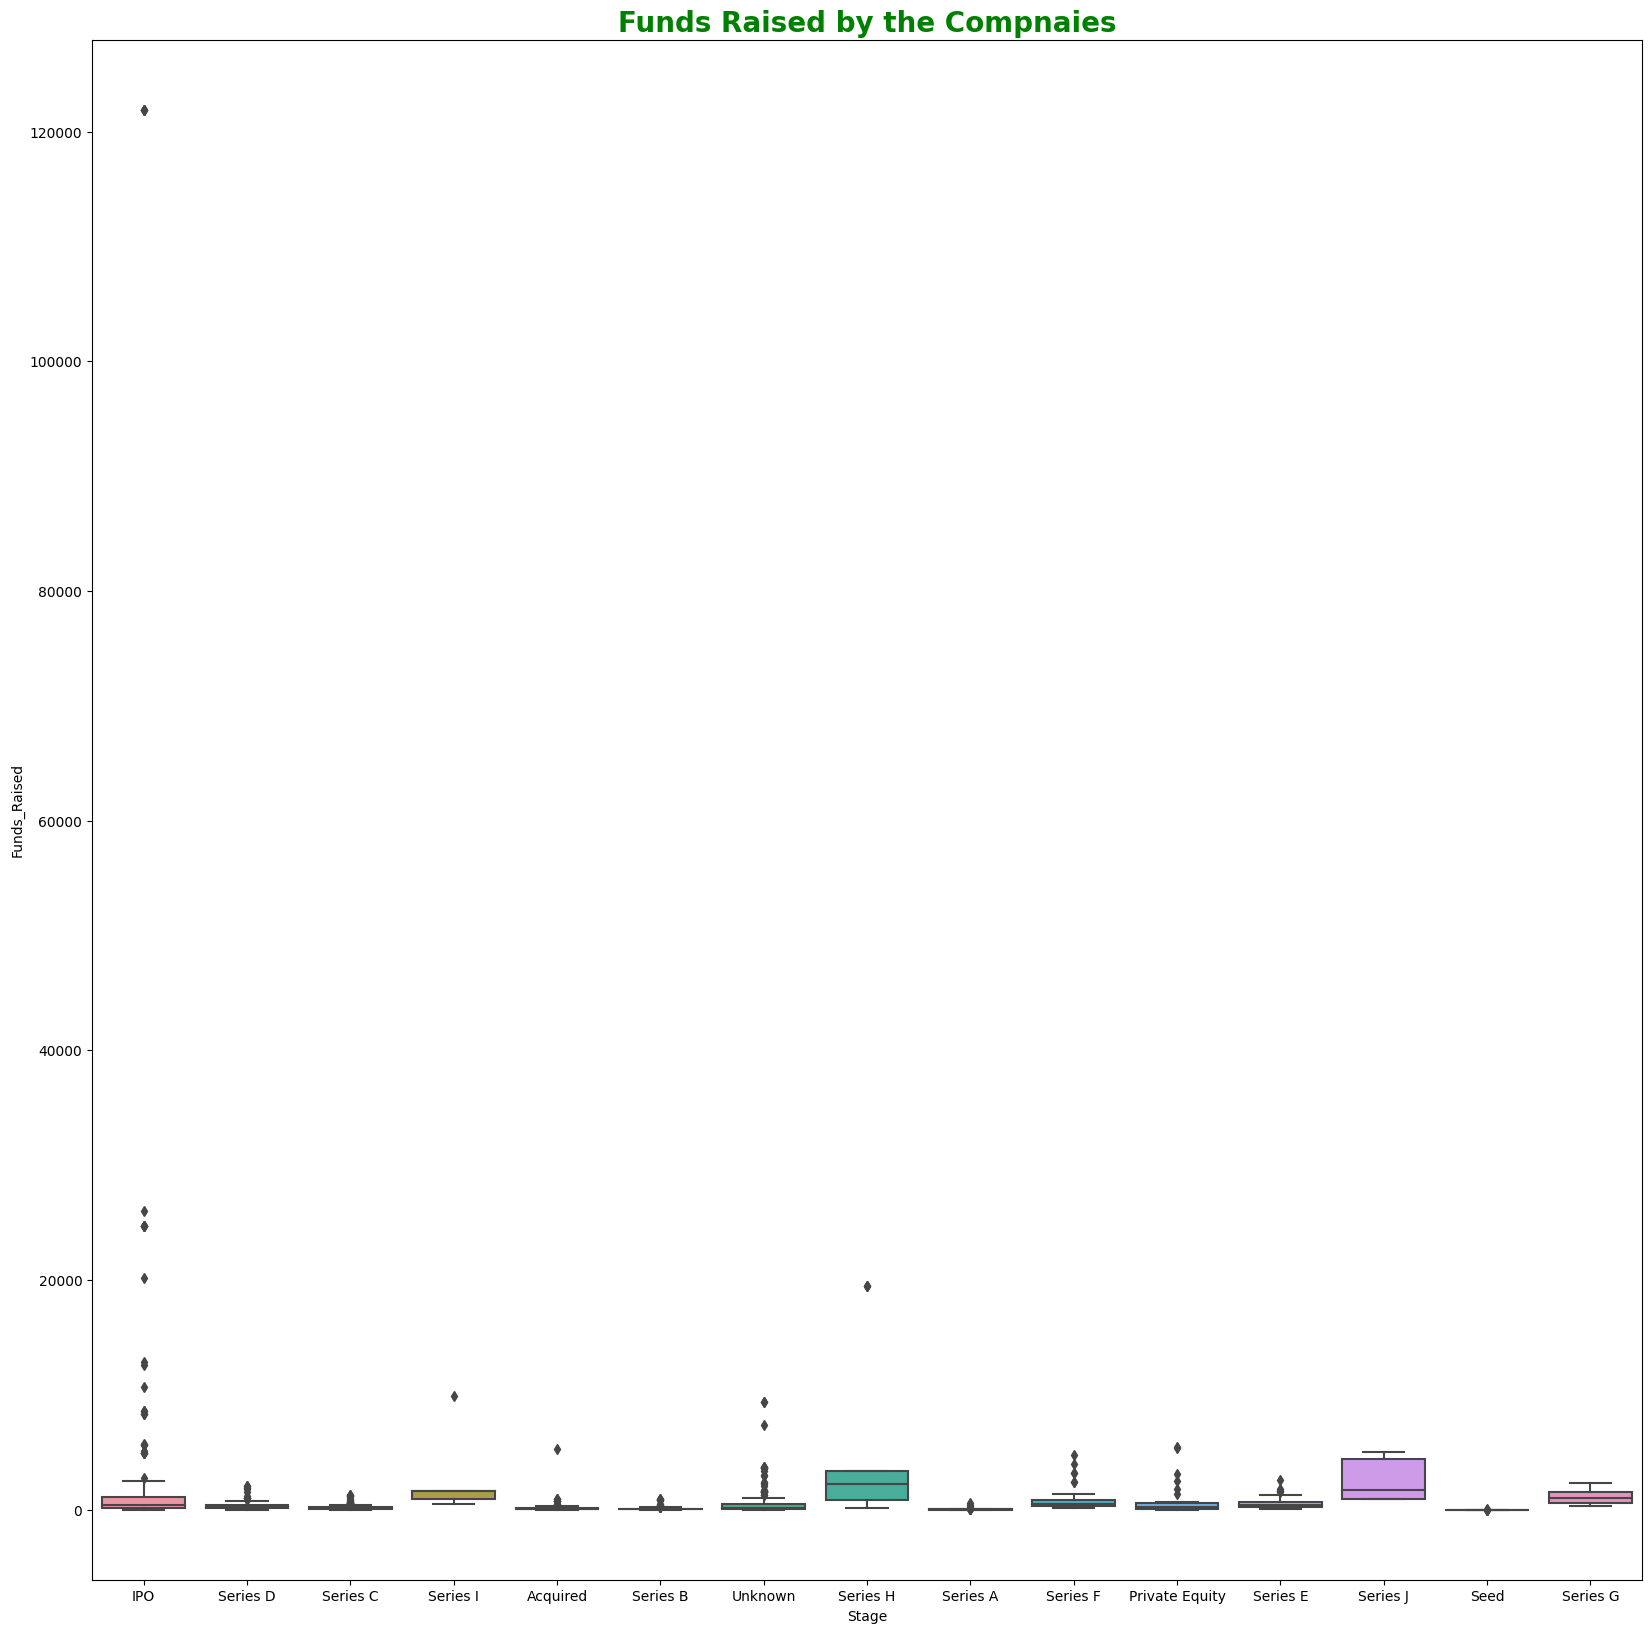

In [442]:
plt.rcParams['figure.figsize']=(20,20)
# plot
ax = sns.boxplot(x= 'Stage' , y = 'Funds_Raised'  , data=  df)
plt.title('Funds Raised by the Compnaies', fontweight='bold', color='green', size=20)

#### Highest Layoff by Company's Stage

Text(0.5, 1.0, "Highest Layoff by Company's Stage")

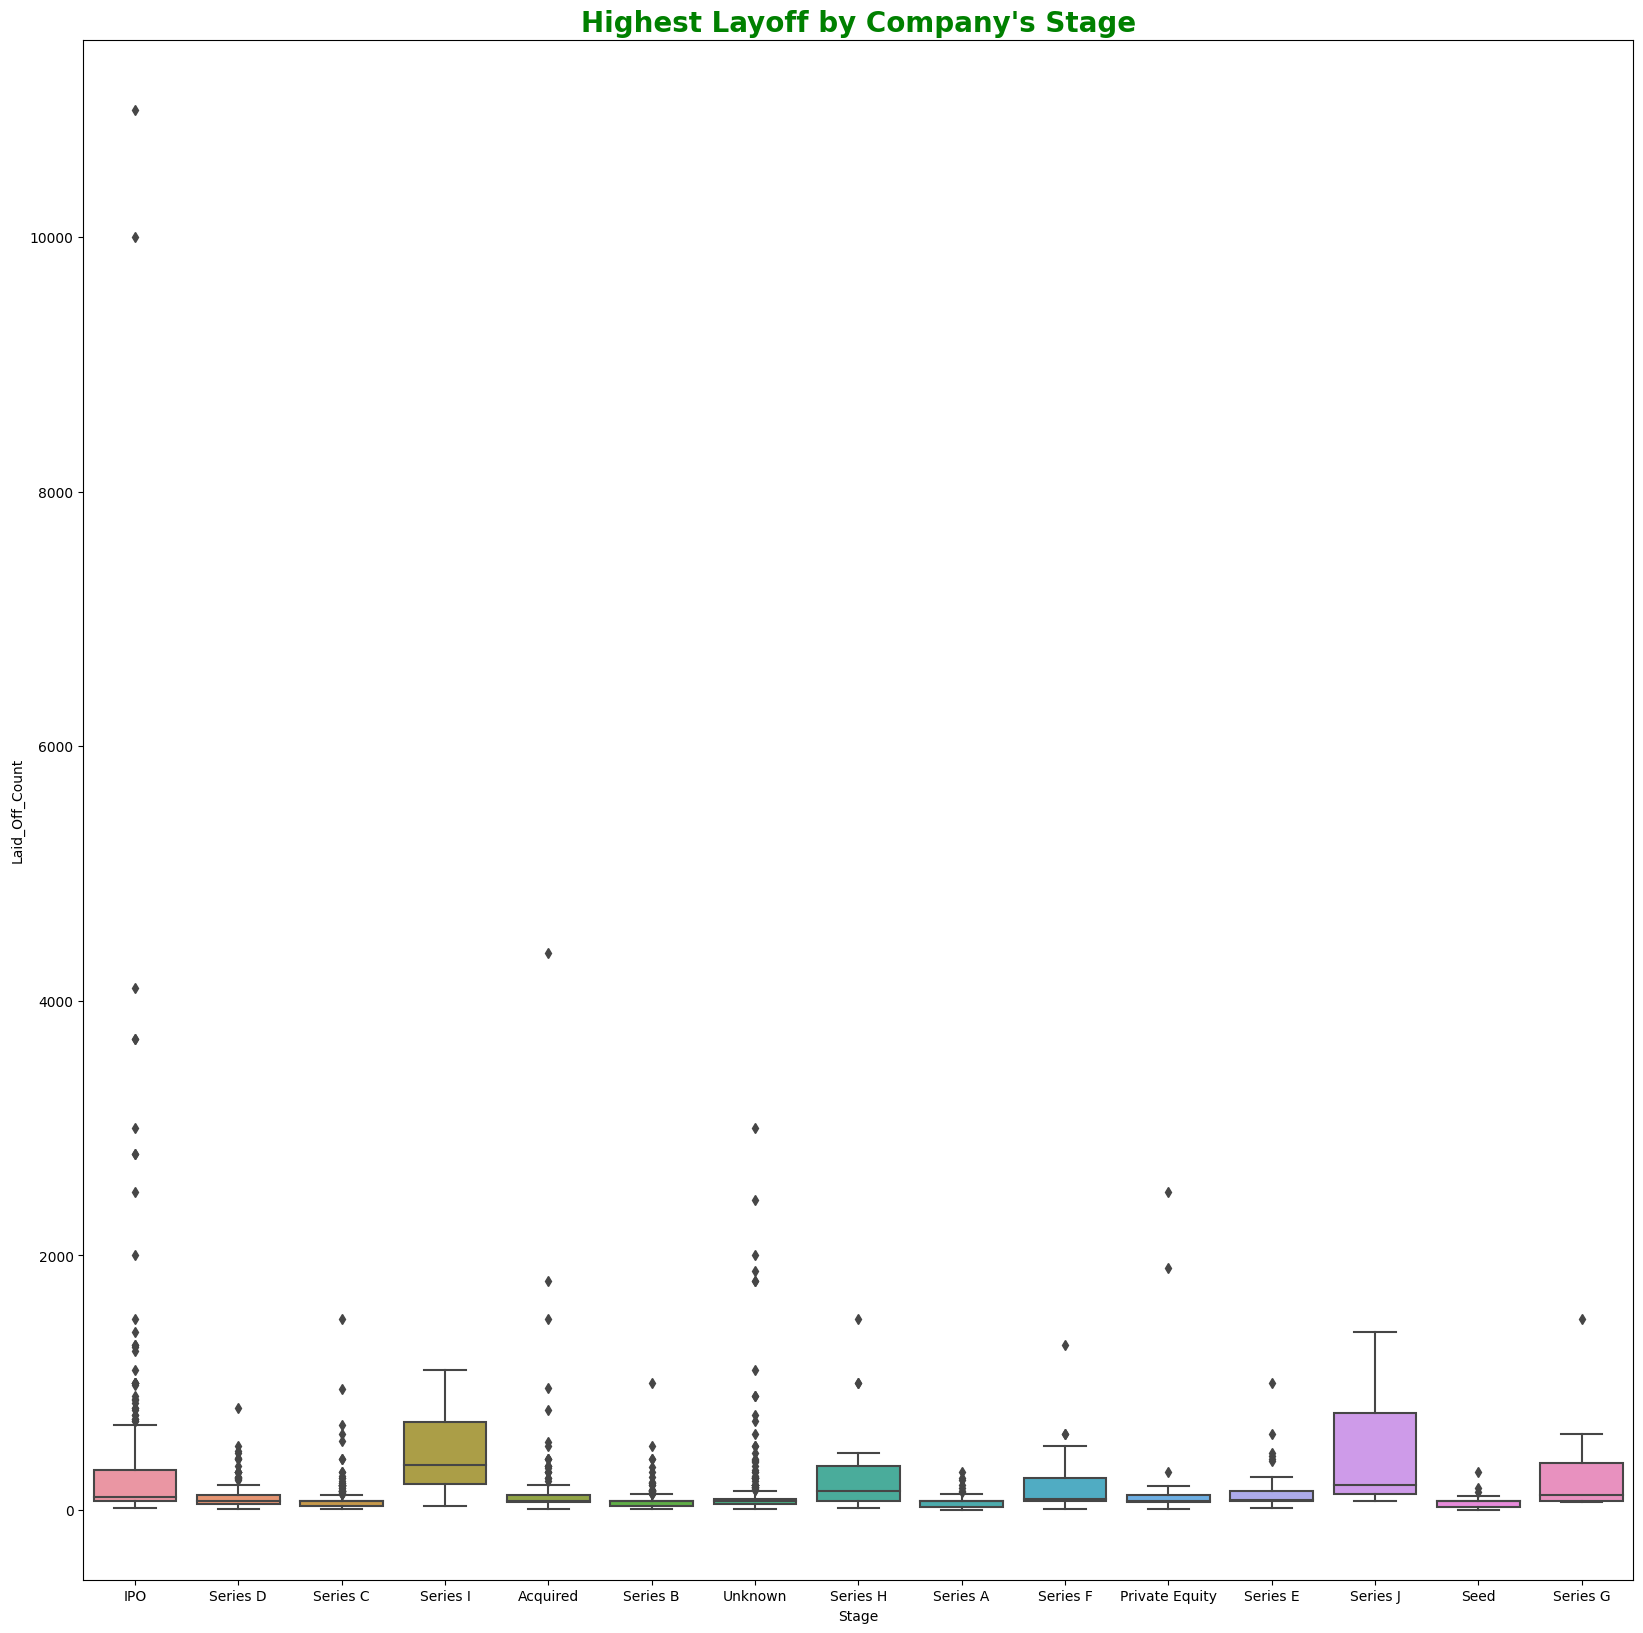

In [443]:
plt.rcParams['figure.figsize']=(20,20)
# plot
ax = sns.boxplot(x= 'Stage' , y = 'Laid_Off_Count'  , data=  df )
plt.title('Highest Layoff by Company\'s Stage', fontweight='bold', color='green', size=20)

Most of the companies have moderate range of layoff , under 50 people

#### Highest layoff by Company

In [444]:
#### Layoff Count
laidoff_count = df.groupby('Company').mean(numeric_only=True)
laidoff_count = laidoff_count.sort_values(by = 'Laid_Off_Count', ascending = False )

Text(0.5, 1.0, 'TOP 20 HIGHEST LAYOFF BY COMPANY')

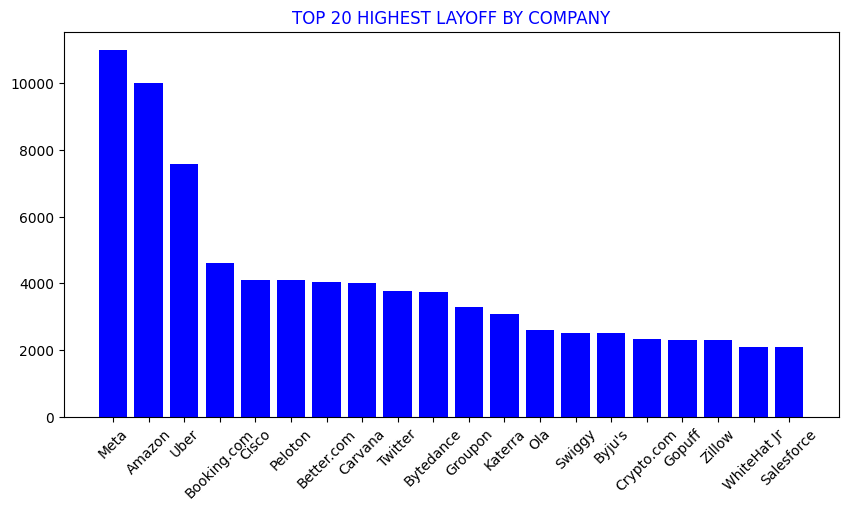

In [445]:
plt.figure(figsize = (10,5))
# DATA:
''' 
** top_20 = companies.iloc[0:20, 0 ]     # Selecting top 20 Companies with highest 'Laid_Off_Count'
 -> companies refer to previous  :
       companies = df.groupby('Company').mean(numeric_only=True)
       companies = companies.sort_values(by= 'Laid_Off_Count', ascending=False)
      
x = top_20.index -> assign label to each bar
y = top_20 -> list the first 20 company ordered by highest layoff results
'''
plt.bar( top_20.index, top_20['Laid_Off_Count'], color='blue' )
# labelling
plt.xticks(rotation = 45)
plt.title('TOP 20 HIGHEST LAYOFF BY COMPANY', color='blue')

#### Industry with the highest layoff

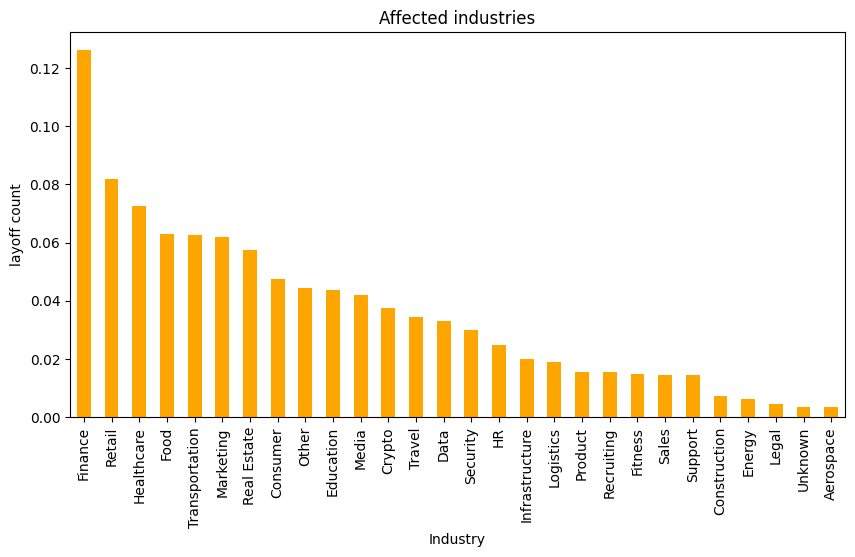

In [446]:
by_industry = df.groupby('Industry').mean(numeric_only=True)
# plot
df['Industry'].value_counts(normalize=True).plot(figsize=(10,5),kind='bar',color='orange')
plt.title("Affected industries")
plt.ylabel('layoff count')
plt.xlabel('Industry');
plt.show()

#### Most affected companies

In [447]:
#Laid_Off_Count
companies = df.groupby('Company').mean(numeric_only=True)
companies = companies.sort_values(by= 'Percentage', ascending=False)
companies.head(40)

,Laid_Off_Count,Percentage,Funds_Raised
Company,,,
Amplero,17.0,1.0,25.00
Pocketmath,21.0,1.0,20.00
PicoBrew,70.0,1.0,15.00
Help.com,16.0,1.0,6.00
Automatic,70.0,1.0,24.00
Pesto,70.0,1.0,6.00
Service,70.0,1.0,5.05
Haus,70.0,1.0,7.00
Nirvana Money,70.0,1.0,NaN


#### Countries most affected by Layoff

Text(0.5, 1.0, 'TOTAL LAYOFF BY COUNTRY: Number of companies involved')

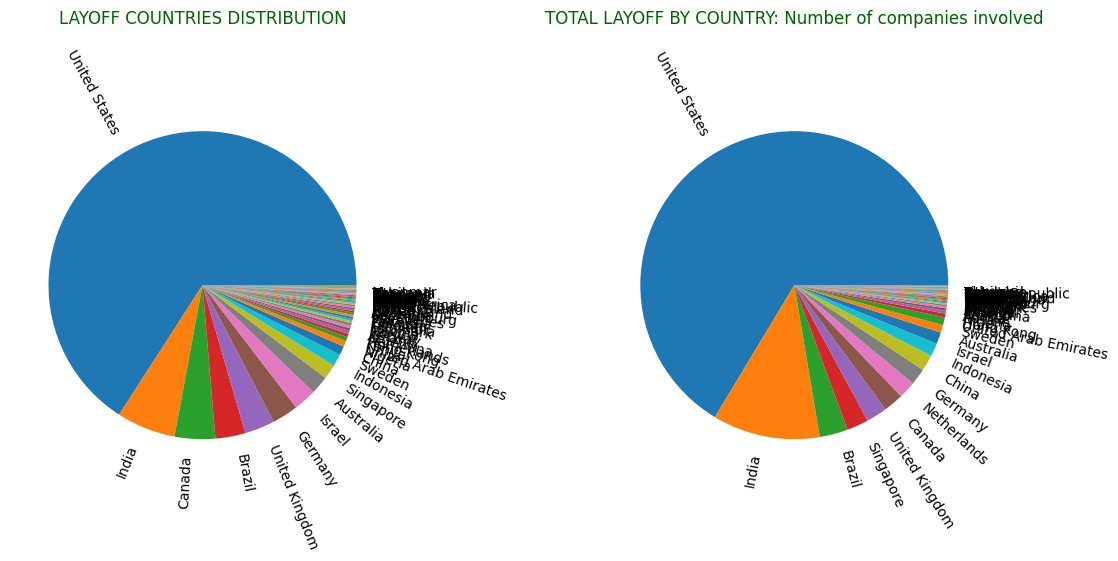

In [448]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 5))
# -------------------------------------------------------------------------- PIE 1 : 
# Count the occurrence a company applied layoff by Country
pie1_data = df['Country'].value_counts(normalize=True)
# Plot
ax1.pie( pie1_data, labels= pie1_data.index, rotatelabels = 45)
# Labelling
ax1.set_title('LAYOFF COUNTRIES DISTRIBUTION', pad =50, color='darkgreen')
# -------------------------------------------------------------------------- PIE 2:
# Data
by_country = df.groupby('Country').sum(numeric_only=True)
by_country = by_country.sort_values(by= 'Laid_Off_Count', ascending=False)
pie2_data = by_country['Laid_Off_Count']
# Plot
ax2.pie( list(pie2_data), labels= list(pie2_data.index),  rotatelabels = 45 )
# labelling
ax2.set_title("TOTAL LAYOFF BY COUNTRY: Number of companies involved", color='darkgreen', pad=50)

I know this visualisation is not the best to identify the smallest portions, however for our analysis only the biggest slices of the pie are relevant

### EDA ANALYSIS
The __First__ Pie Char aimed to calculated the amount of people who lost their job, locating the correspective country.

The __Second__ Pie Char calculated instead the occurencies of the origin of a company, finfing out how many compnay were affected in a country compared with others.
> Results

Most of the people in our data sample lost their jobs in __United States__ and __India__, which registered significantly the histest layoff

In __Uk__ less companies adoped layoff but an more people lost their jobs compared with other countries

## US Companies

To this point, we understood that the US data are the most relevant figures in our dataset to which it will be dedicated a brief more in depth consideration.

In [449]:
us_companies = df[df['Country'] == 'United States' ]
us_companies

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,date_parsed,layoff_distribution
2,ChowNow,Los Angeles,Food,40.0,0.10,2022-12-14,64.0,Series C,United States,2022-12-14,"(0, 50]"
3,Landing,Birmingham,Real Estate,70.0,0.18,2022-12-14,347.0,Series C,United States,2022-12-14,"(50, 100]"
4,Thumbtack,SF Bay Area,Consumer,160.0,0.14,2022-12-13,698.0,Series I,United States,2022-12-13,"(100, 500]"
5,Edgio,Phoenix,Infrastructure,95.0,0.10,2022-12-13,462.0,IPO,United States,2022-12-13,"(50, 100]"
6,Komodo Health,SF Bay Area,Healthcare,78.0,0.09,2022-12-13,50.0,Series C,United States,2022-12-13,"(50, 100]"
...,...,...,...,...,...,...,...,...,...,...,...
1804,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,45.0,Unknown,United States,2020-03-13,"(0, 50]"
1805,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,1.0,Seed,United States,2020-03-13,"(0, 50]"
1806,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,90.0,Series C,United States,2020-03-12,"(0, 50]"
1807,EasyPost,Salt Lake City,Logistics,75.0,0.18,2020-03-11,12.0,Series A,United States,2020-03-11,"(50, 100]"


In [450]:
count_us_companies = us_companies.groupby(by='Company').mean()
count_us_companies.shape[0]

/var/folders/m7/nd04n9m14gx4x780byggkvpr0000gn/T/ipykernel_884/1281384209.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  count_us_companies = us_companies.groupby(by='Company').mean()


992

There are __992__ Us companies in teh dataset

## US DATA

/var/folders/m7/nd04n9m14gx4x780byggkvpr0000gn/T/ipykernel_884/2691428928.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels( x_countries, rotation=45)
/var/folders/m7/nd04n9m14gx4x780byggkvpr0000gn/T/ipykernel_884/2691428928.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(  us_stage['Company'].index,  rotation=45)
/var/folders/m7/nd04n9m14gx4x780byggkvpr0000gn/T/ipykernel_884/2691428928.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(  top10_us_companies.index,  rotation=45)
/var/folders/m7/nd04n9m14gx4x780byggkvpr0000gn/T/ipykernel_884/2691428928.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(  top10_us_companies.index,  rotation=45)


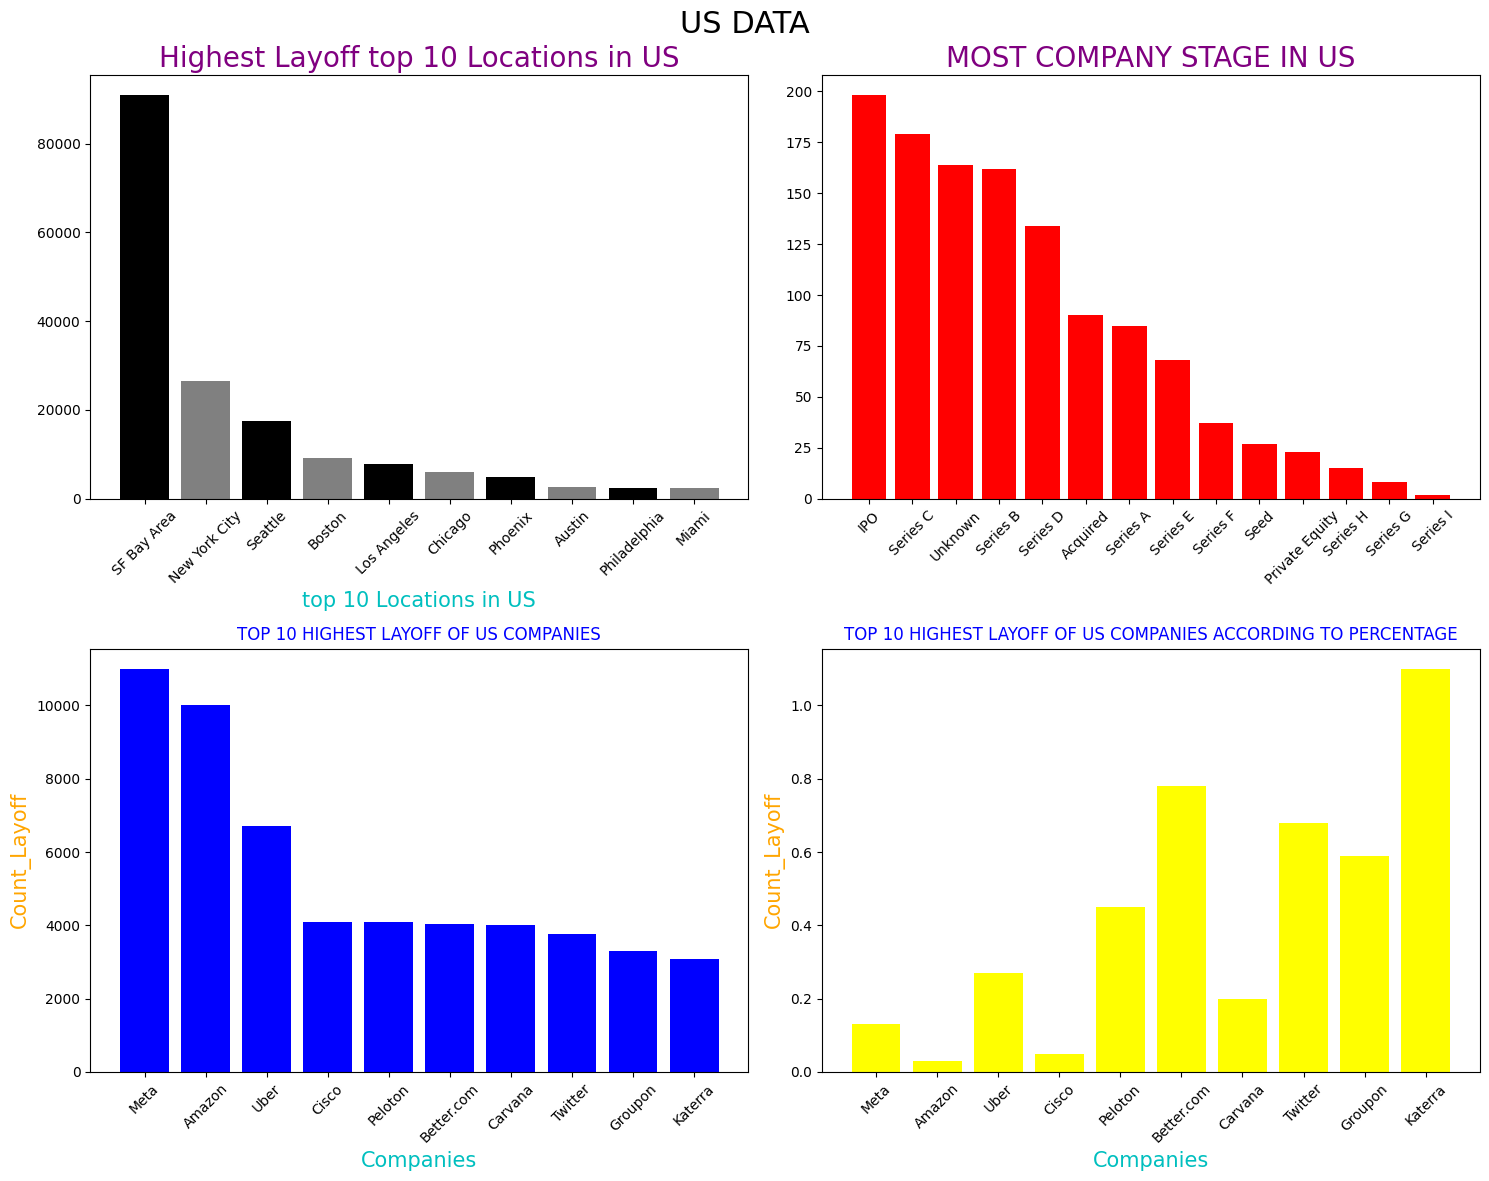

In [451]:
# - set grid
fig, ax = plt.subplots(2,2, figsize=(15,12))
fig.suptitle('US DATA', size=22)
# us_companies
#--------------------------------------------------------- GRAPH 1:  LOCATION MOST AFFECTED BY LAYOFF
# data
by_location = us_companies.groupby('Location').sum(numeric_only=True)
by_location = by_location.sort_values(by= 'Laid_Off_Count', ascending=False)
# Returns 100 rows = 100 locations in total
# Cut to top 10 with highest layoff
top10_location = by_location.iloc[0:10, 0]
# Extract name of the countries
x_countries = top10_location.index
# color bars:
c_bars=['black', 'grey']
# plot:
ax[0,0].bar( x_countries, top10_location , color = c_bars )
# labelling
ax[0,0].set_xticklabels( x_countries, rotation=45)
ax[0,0].set_title('Highest Layoff top 10 Locations in US', color='purple', fontsize= 20)
ax[0,0].set_xlabel('top 10 Locations in US', color='c', fontsize= 15)
#--------------------------------------------------------- GRAPH 2:  COUNT WHICH STAGE WHERE MOST COMPANIES
# data
us_stage = us_companies.groupby(by='Stage').count()
us_stage = us_stage.sort_values('Laid_Off_Count' , ascending=False)
# plot:
ax[0,1].bar( us_stage['Company'].index , us_stage['Company'] , color = 'red' )
# labelling
ax[0,1].set_xticklabels(  us_stage['Company'].index,  rotation=45)
ax[0,1].set_title('MOST COMPANY STAGE IN US', color='purple', fontsize= 20)
#--------------------------------------------------------- GRAPH 3: TOP MOST AFFECTED US COMPANIES ACCORDING TO TOT LAYOFF
# DATA:
us_companies = us_companies.groupby(by='Company').sum(numeric_only=True)
us_companies = us_companies.sort_values('Laid_Off_Count', ascending=False)
top10_us_companies = us_companies.iloc[0:10, 0]
#top10_corresponding_percentage = us_companies.iloc[0:10, 1]
# plot
ax[1,0].bar( top10_us_companies.index , top10_us_companies, color='blue' )
# labelling
ax[1,0].set_xticklabels(  top10_us_companies.index,  rotation=45)
ax[1,0].set_title('TOP 10 HIGHEST LAYOFF OF US COMPANIES', color='blue')
ax[1,0].set_xlabel('Companies', color='c', fontsize= 15)
ax[1,0].set_ylabel('Count_Layoff', color='orange', fontsize= 15)
#--------------------------------------------------------- GRAPH 4: TOP MOST AFFECTED US COMPANIES ACCORDING TO PERCENTAGE
# Data
top10_corresponding_percentage = us_companies.iloc[0:10, 1]
# PLOT
ax[1,1].bar( top10_us_companies.index ,top10_corresponding_percentage , color='yellow' )
# labelling
ax[1,1].set_xticklabels(  top10_us_companies.index,  rotation=45)
ax[1,1].set_title('TOP 10 HIGHEST LAYOFF OF US COMPANIES ACCORDING TO PERCENTAGE', color='blue' )
ax[1,1].set_xlabel('Companies', color='c', fontsize= 15)
ax[1,1].set_ylabel('Count_Layoff', color='orange', fontsize= 15)
# --------------------------------------

fig.tight_layout() 

In __US__  the __LOCATIONS__ most affected result to be:
1. SF Bay Area
2. NewYork city
3.  Seattle
4. Boston
5. Los Angeles
    
Companies in __IPO__ financial stage were the most at risk, it is a cruacial stage for a comonay and it shows how precarious are these companies in such stage, more than the __seeds__ interestingly.

At the end of the Financial Risk classification we notice __SERIE G__ & __SERIE I__ stage, To elaborate such position however we must consider that less company, not many, reach that financial level, that's why we see it at the end of the line. It doesn't necessarily that these company weren't affected by layoff.

__Seed__ are found towards the end too, to consider however that still, these compnaies have less too lose and less resources and workforce to make redundant.

Interenstingly we found __Serie C__ more at risk than __Serie D__ & __Serie D__.

__Series D__ funding occurs when the business was not able to meet its targets with its Series C, and consequently it can mean that the business is now at a lower valuation. Being priced at a lower valuation is usually very negative for a business.

The same for __Series E__ . This is, again, a very bad sign, and very few companies are going to survive to Series E funding. 
Series E funding will only occur if the business still hasn’t been able to make up its own capital 
but the business is still struggling to remain active and private.

Despite the definition, it seemed US __Series C__ were in worse condition over the Pandemic.


### Layoff 

To redimension the __layoff__ and __Percentage__ data, the graph on the left have to be paired with the yellow bar graph on the right, to understand the lreal loss of the company. In fact, despicte Meta and Amazon shares big layoff number, overall the workforce of the compnay wasn't so affected, as le than 20% of the labour was cut off.

The workforce of these company is on avergae:

Meta 71 000         employees 

Amazon 1 million    "

Cisco 72 000        "

Uber 22-29 000      "

Peloton    8 000    "

better.com 8 000    "

#### INDUSTRIES' LAYOFF IN US

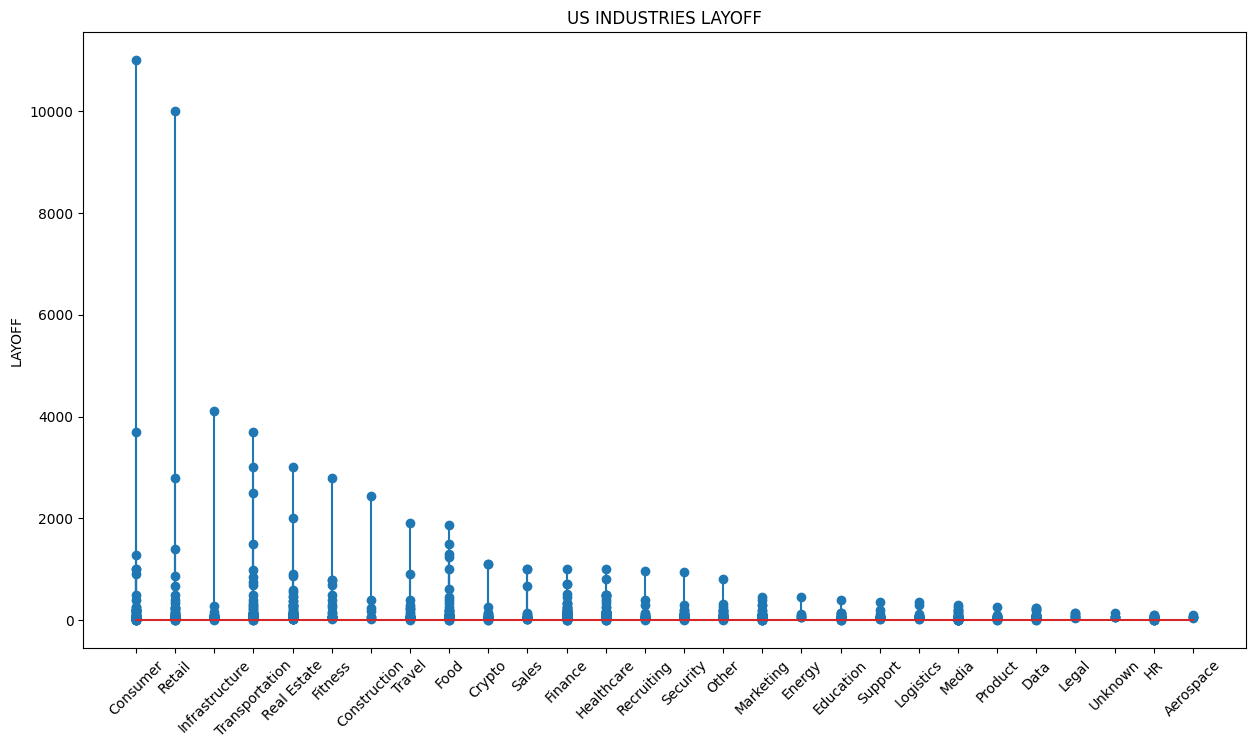

In [452]:
plt.figure(figsize=(15,8))
us_df = df[df['Country']=='United States']
us_df = us_df.sort_values('Laid_Off_Count' , ascending=False)
# 992 companies evaluated
# --------------------------------------------------------------PLOT
plt.stem( us_df['Industry'],   us_df['Laid_Off_Count'] )
# labelling
plt.xticks(rotation=45)
plt.title('US INDUSTRIES LAYOFF')
plt.ylabel('LAYOFF')
plt.show()

It's relevant to observ that 1192 rows were returned, meaning tha 1192 Us copanies were found in this database. During our analysis we should take into account this, as the data could be biased otherwise.

In __US__  the __INDUSTRIES__ most affected result to be:
1. Consumer
2. Retail
3 Infrastructure
4. Trasportatiom
5. Real Estate
    
The sector __less at risk__ were:
1. Aereospace
2. HR
3. Legal
4. DAta

>

# WORLD DATA

#### Median of Percentage-loss of Companies

In [453]:
n_companies = df.groupby(by='Company').mean(numeric_only=True)
n_companies.shape[0] 

1501

Found __1501 companies__ in total in the dataset

In [454]:
count_percentage = n_companies['Percentage']
count_percentage

Company
 Included Health    0.06
&Open               0.09
100 Thieves         0.18
10X Genomics        0.08
1stdibs             0.17
                    ... 
iPrice Group        0.20
iRobot              0.10
kununu              0.18
tZero               0.18
uShip               0.37
Name: Percentage, Length: 1501, dtype: float64

In [455]:
# median of Percentage data
median = count_percentage.median()
median

0.18

Text(0.5, 1.0, 'Median Companies Percentage-loss')

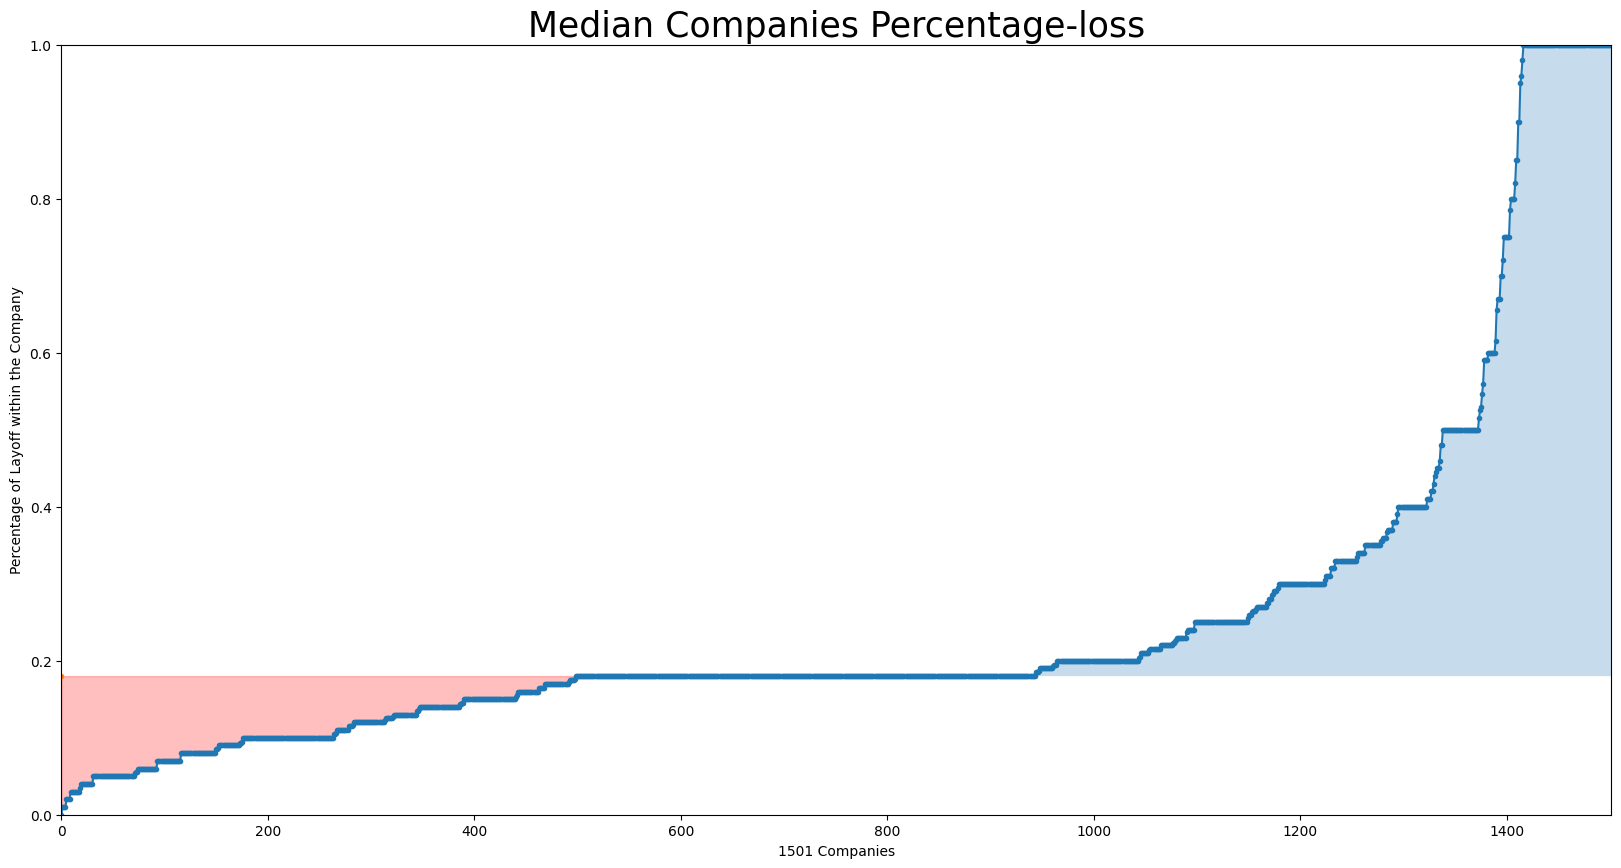

In [467]:
fig = plt.figure(figsize=(20, 10))
# ---------------------------------------------------------
# x axes = spacing the 1501 different Comapnies = n_companies = 1501 types = 1501 markers
scale = np.linspace(0, 1501, n_companies.shape[0] )
# plot , same logic with addition of the median
avg_percentage = n_companies['Percentage'].mean()
avg_percentage = n_companies['Percentage'].sort_values()
plt.plot(scale, avg_percentage, median, label='Average Percentage', marker ='.')
# Adding colors above and under the median to headlight the portion of Companies above and under such value
plt.fill_between( scale, avg_percentage, median, where=(median<avg_percentage), interpolate=True, alpha=0.25)
plt.fill_between( scale, avg_percentage, median, where=(median>=avg_percentage), interpolate=True, alpha=0.25, color= 'red') 
# labelling
plt.xlabel('1501 Companies')
plt.ylabel('Percentage of Layoff within the Company')
plt.xlim(0,1501)
plt.ylim(0, 1)
plt.title('Median Companies Percentage-loss', fontsize= 25)

In [457]:
avg_percentage

Company
TaskUs            0.00
Splunk            0.01
Affirm            0.01
F5                0.01
N26               0.01
                  ... 
Halcyon Health    1.00
Popin             1.00
Haus              1.00
Qin1              1.00
Fifth Season      1.00
Name: Percentage, Length: 1501, dtype: float64

On average, a comapny would expect to __loose less than 0.3 workforce (<30%)__ of their companies consequently to the 2019 crisis 

#### Percentage Distribution

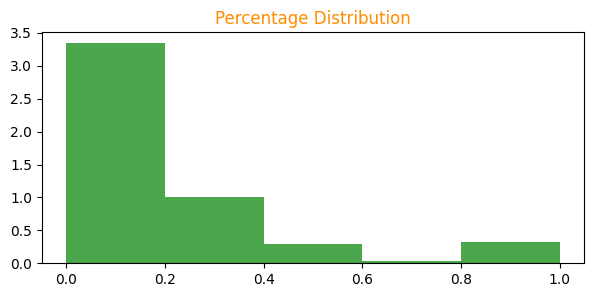

In [458]:
plt.figure(figsize=(7,3))
# plot
plt.hist(df['Percentage'], 5, density =1,facecolor="green", alpha=0.7 )
# labelling
plt.title('Percentage Distribution', color='darkorange')
plt.show()

most of the compnaies lost 20% of the __workforce__

#### Correlation between Funds Raised and Percentage of Layoff

Text(0.5, 1.0, 'Correlation Fund Raised vs Layoff Percentage')

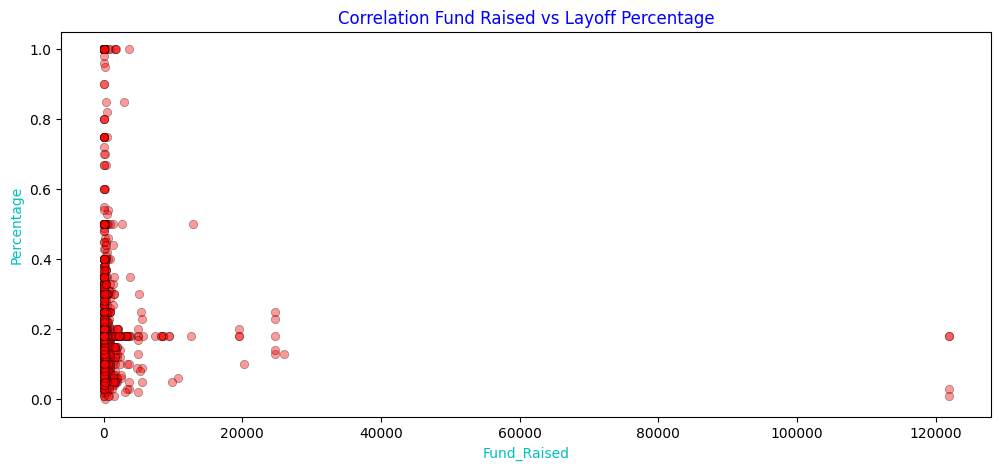

In [459]:
plt.figure(figsize=(12,5))
# DATA
x = df['Funds_Raised']
y = df['Percentage']
#------------------------------------------------------------------------------ GRAPH : SCATTER 
plt.scatter( x  , y,  edgecolor = 'black', c = 'red', linewidth = 0.5, alpha = 0.4)
# labelling& 
plt.ylabel( 'Percentage', color='c')
plt.xlabel('Fund_Raised', color= 'c')
plt.title('Correlation Fund Raised vs Layoff Percentage', color='blue')

There is not a direct srong correlation between Financil Stage and Percentage-loss of a comoany, however, we don't have many sample of big companies.

Compannies with the __highest finalcial__ funds survived.

Fre compnaies at the __beginning of the financial stage__ bankrupt (loosing 100% workforce)


## TIME MOST AFFECTED

Text(0, 0.5, 'Total Sales')

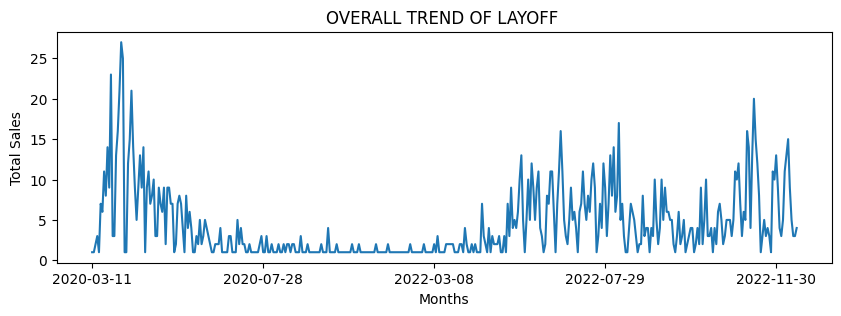

In [460]:
plt.figure(figsize = (10,3))
dates = df.groupby('Date').size()
x = df['Percentage'].mean()
y = df['Funds_Raised'].mean()

plot_time = dates.plot(title = 'OVERALL TREND OF LAYOFF ')
plot_time.set_xlabel('Months')
plot_time.set_ylabel('Total Sales')

Overall, the layoff has reduced compared with the hishet wave registered back on MARCH-APRIL 2020.

# Filtering Dates

## YEAR 2020

In [461]:
# Filtering Dates
filt =  ( df['Date'] >= '2020'  ) &   ( df['Date'] < '2021' )
df2020 = df.loc[filt]
#df2020

Text(0, 0.5, 'Total Laidoff')

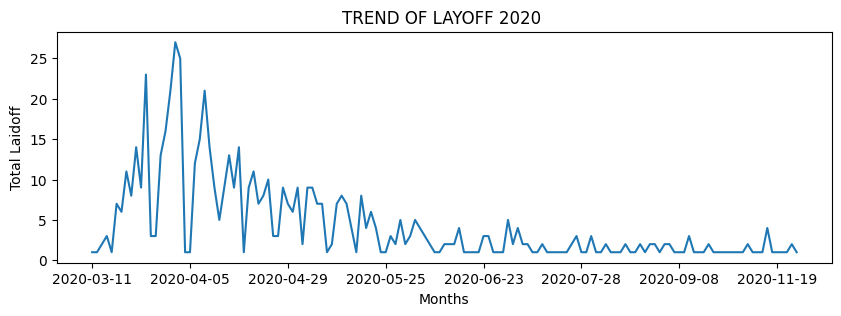

In [462]:
plt.figure(figsize = (10,3))

dates = df2020.groupby('Date').size()
plot_time = dates.plot(title = 'TREND OF LAYOFF 2020 ')
# labelling
plot_time.set_xlabel('Months')
plot_time.set_ylabel('Total Laidoff')

## YEAR 2021

In [463]:
# Filtering Dates
filt = ( df['Date'] >= '2021' ) &  (df['Date'] < '2022' )
df2021 = df.loc[filt]
# df2021

Text(0, 0.5, 'Total Laidoff')

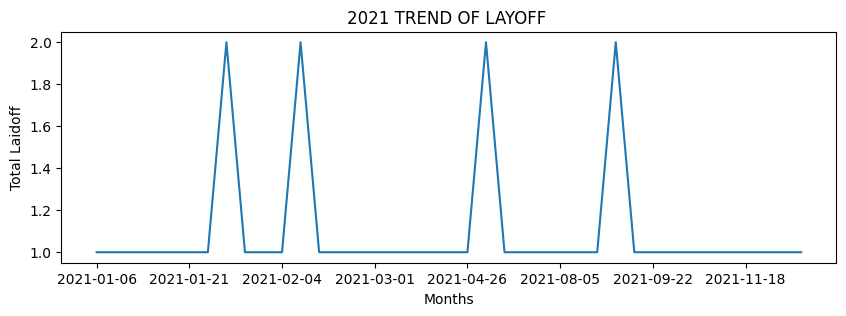

In [464]:
plt.figure(figsize = (10,3))

dates = df2021.groupby('Date').size()
plot_time = dates.plot(title = '2021 TREND OF LAYOFF ')
# 
plot_time.set_xlabel('Months')
plot_time.set_ylabel('Total Laidoff')

Not enough data about 2021

## YEAR 2022

In [465]:
# Filtering Dates
filt =  ( df['Date'] >= '2022'  ) 
df2022 = df.loc[filt]
#df2022

Text(0, 0.5, 'Total Laidoff')

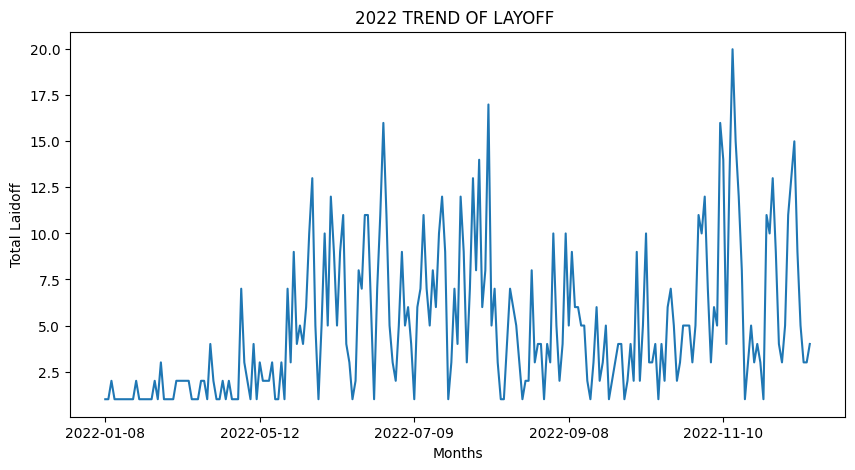

In [466]:
plt.figure(figsize = (10,5))

dates = df2022.groupby('Date').size()
plot_time = dates.plot(title = '2022 TREND OF LAYOFF ')
# Labelling
plot_time.set_xlabel('Months')
plot_time.set_ylabel('Total Laidoff')

Spike over the summer and before Christmas, surprisingly, time when usually companies tend to hire more staff.

# CONCLUSION

1501  Companies,  992 of those are  from us = 65.5% of the df.

## LAYOFF TREND OVER TIME

We found that in this dataset the data related to the time frame 2021 are missing. Overall, we distinguish a significant spike in layoff at the beginning of 2020, corresponding with the first lockdown announcement. The situation stabilised after May 2020.  Probably it took an uphill turn during the year 2021 but unfortunately, we have no record of it.

During 2022 we didn’t assist to similar figures, but another layoff trend took off during the 2022 summer and before the Christmas festivity, headlighting the theory that the Inflation and an economic crisis is starting


## WORLD DATA

Most of the companies have moderate loss of workforce: under 50 people
Most of the companies lost 20% of the workforce
On average, a company would expect to lose less than 0.3 workforce (<30%)  

Amazon, Meta and Cisco registered the highest layoff.
Layoff Classification by Company:
Meta – Amazon – Uber – Booking – Cisco -Peloton – Better.com – Carvana – Teitter - Bytedance

There is not a direct strong correlation between Financial Stage and Percentage-loss of a company, however, we don't have many samples of big companies.

Companies with the highest financial funds survived.

For some companies at the beginning of the financial stage bankrupt (loosing 100% workforce

Series H and Series J were confirmed to be the Financial Stages with the highest cash available.
Companies with stage:   IPO.      Serie J.     Serie H,  were the most affected from layoff.


Finance and Retail were  the most affected industries
Followed by Healthcare, Food and Transportation

Most of the people in our data sample lost their jobs in United States (however, we know that we had far more data related to such Location) and India, which significantly registered the highest layoff.


## US DATA 

There are  1501 Companies in the dataset and 992 are from us , equal to 65.5% of the whole data. It is therefore a deeper analysis were carried on such Country.

Results:

In US the LOCATIONS most affected result to be:
1. SF Bay Area
2. New York city
3.  Seattle
4. Boston
5. Los Angeles

In US  the INDUSTRIES most affected result to be:
1. Consumer
2. Retail
3 Infrastructure
4. Transportation
5. Real Estate
    
The sector less at risk were:
1. Aerospace
2. HR
3. Legal
4. Data

Companies in IPO financial stage were the most at risk.
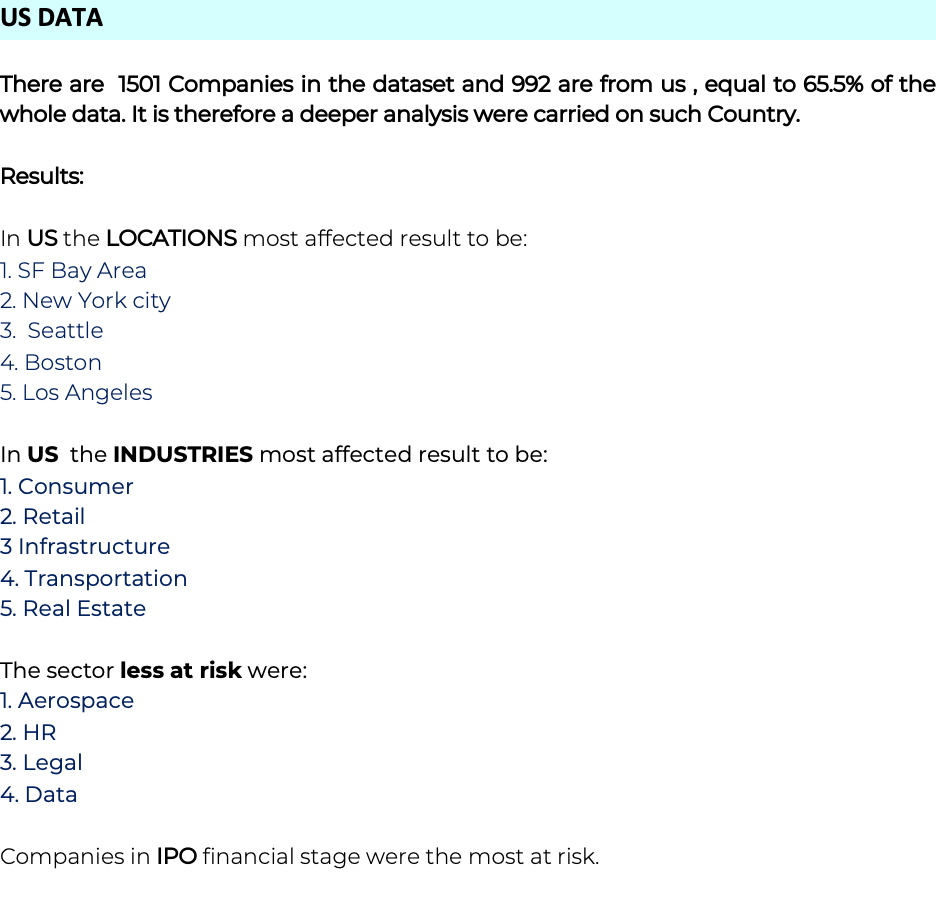


# FINAL NOTE

It would have been interesting extend this anlysis with a count of hired employees along the years 2020-2022, to check if there was a recover of the job loss. As well the data from 2021 would habe been most relevante to complete this database.
